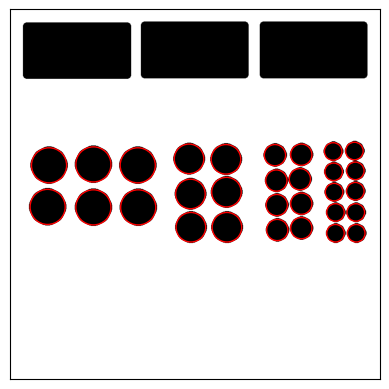

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tamaño del grid
filas = 800
columnas = 800

# Crear una matriz vacía para representar el grid
grid = np.zeros((filas, columnas))

# Función para mostrar el grid con círculos
def mostrar_grid(grid, circulos):
    # Mostrar el grid en blanco y negro
    plt.imshow(grid, cmap='binary')

    # Dibujar cada círculo en rojo como contorno
    for circulo in circulos:
        plt.gca().add_patch(plt.Circle((circulo['center_x'], circulo['center_y']), circulo['radius'], color='red', fill=False))

    # Eliminar los ejes del gráfico
    plt.xticks([])
    plt.yticks([])

    # Mostrar el gráfico
    plt.show()

# Función para crear círculos en el grid
def crear_circulo(grid, centro, radio):
    # Crear una máscara circular y asignar valores de 1 a los píxeles dentro del círculo
    y, x = np.ogrid[-centro[0]:grid.shape[0]-centro[0], -centro[1]:grid.shape[1]-centro[1]]
    mascara = x*x + y*y <= radio*radio
    grid[mascara] = 1

# Función para crear rectángulos en el grid
def llenar_rectangulo(grid, rectangulo):
    # Asignar valores de 1 a los píxeles dentro del rectángulo
    x, y = rectangulo['x'], rectangulo['y']
    ancho, alto = rectangulo['width'], rectangulo['height']
    grid[y:y+alto, x:x+ancho] = 1

# Función para actualizar el grid en cada paso de tiempo
def actualizar_grid(grid):
    # Crear un nuevo grid para almacenar los valores actualizados
    nuevo_grid = np.zeros_like(grid)
    for i in range(1, filas - 1):
        for j in range(1, columnas - 1):
            # Sumar los valores de los vecinos
            suma_vecinos = (
                grid[i - 1, j - 1] + grid[i - 1, j] + grid[i - 1, j + 1] +
                grid[i, j - 1] + grid[i, j + 1] +
                grid[i + 1, j - 1] + grid[i + 1, j] + grid[i + 1, j + 1]
            )
            # Aplicar reglas del autómata celular
            if suma_vecinos >= 3:
                nuevo_grid[i, j] = 1
            else:
                nuevo_grid[i, j] = 0

    return nuevo_grid

# Lista de círculos y rectángulos proporcionados
circulos = [
    {'center_x': 749, 'center_y': 484, 'radius': 19},
    {'center_x': 704, 'center_y': 484, 'radius': 19},
    {'center_x': 578, 'center_y': 477, 'radius': 23},
    {'center_x': 630, 'center_y': 473, 'radius': 23},
    {'center_x': 469, 'center_y': 471, 'radius': 32},
    {'center_x': 391, 'center_y': 471, 'radius': 32},
    {'center_x': 748, 'center_y': 439, 'radius': 19},
    {'center_x': 704, 'center_y': 439, 'radius': 19},
    {'center_x': 577, 'center_y': 423, 'radius': 23},
    {'center_x': 630, 'center_y': 420, 'radius': 23},
    {'center_x': 277, 'center_y': 428, 'radius': 38},
    {'center_x': 180, 'center_y': 428, 'radius': 38},
    {'center_x': 81, 'center_y': 427, 'radius': 38},
    {'center_x': 701, 'center_y': 395, 'radius': 19},
    {'center_x': 747, 'center_y': 393, 'radius': 19},
    {'center_x': 390, 'center_y': 399, 'radius': 32},
    {'center_x': 468, 'center_y': 395, 'radius': 32},
    {'center_x': 576, 'center_y': 370, 'radius': 23},
    {'center_x': 627, 'center_y': 367, 'radius': 23},
    {'center_x': 700, 'center_y': 351, 'radius': 19},
    {'center_x': 747, 'center_y': 349, 'radius': 19},
    {'center_x': 276, 'center_y': 337, 'radius': 38},
    {'center_x': 84, 'center_y': 337, 'radius': 38},
    {'center_x': 180, 'center_y': 335, 'radius': 38},
    {'center_x': 573, 'center_y': 315, 'radius': 23},
    {'center_x': 630, 'center_y': 314, 'radius': 23},
    {'center_x': 467, 'center_y': 324, 'radius': 32},
    {'center_x': 387, 'center_y': 323, 'radius': 32},
    {'center_x': 699, 'center_y': 307, 'radius': 19},
    {'center_x': 745, 'center_y': 306, 'radius': 19}


]

rectangulos = [

    {'x': 31, 'y': 32, 'width': 228, 'height': 116},
    {'x': 543, 'y': 30, 'width': 227, 'height': 117},
    {'x': 286, 'y': 30, 'width': 227, 'height': 117}

]

# Crear círculos y rectángulos en el grid
for circulo in circulos:
    crear_circulo(grid, (circulo['center_y'], circulo['center_x']), circulo['radius'])

for rectangulo in rectangulos:
    llenar_rectangulo(grid, rectangulo)

# Ejecutar la simulación con solo 3 generación
generaciones = 3
for _ in range(generaciones):
    grid = actualizar_grid(grid)

# Mostrar el grid con círculos
mostrar_grid(grid, circulos)